In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pickle

In [22]:
with open('/n/ramanathan_lab/aboesky/reward_contours/skinnycontours_100.pkl', 'rb') as f:
    contours = pickle.load(f)

In [23]:
contours[50].shape

(1000, 1000)

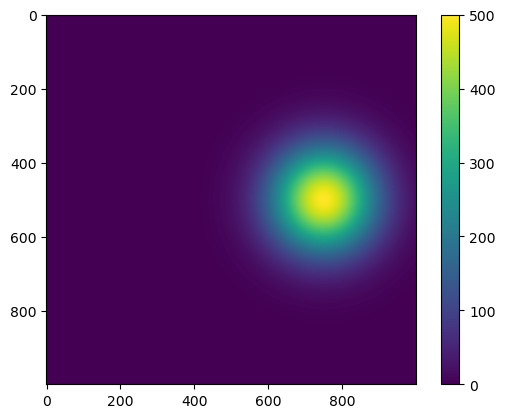

In [24]:
plt.imshow(contours[0])
plt.colorbar()

In [ ]:
with open('/n/ramanathan_lab/aboesky/stationary_test_wrapped_results/agent_50.pkl', 'rb') as f:
    test = pickle.load(f)

FileNotFoundError: [Errno 2] No such file or directory: '/n/ramanathan_lab/aboesky/stationary_test_wrapped_results/agent_50.pkl'

In [66]:
agent_paths = []
for i in range(100):
    with open(f'/n/ramanathan_lab/aboesky/alternating_10000_pyramid_results/agent_{i}.pkl', 'rb') as f:
        agent_paths.append(pickle.load(f))

In [67]:
agent_paths[1].shape

(100001, 2)

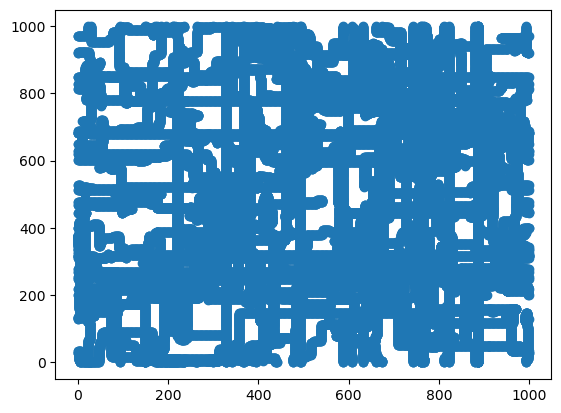

In [68]:
ind = 25
plt.scatter(agent_paths[ind][:, 1], agent_paths[ind][:, 0])

In [69]:
path_density = np.zeros((1000, 1000))
for path in agent_paths:
    path_density[path[:,0], path[:,1]] += 1

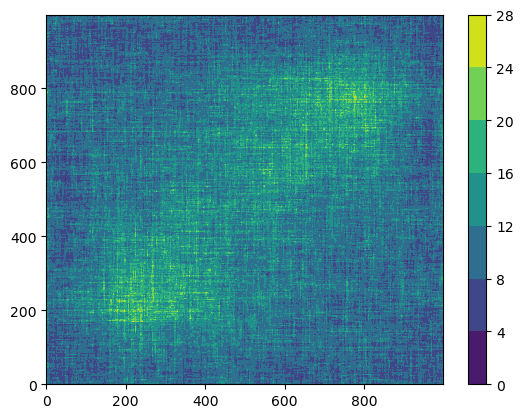

In [70]:
plt.contourf(path_density)
plt.colorbar()
plt.show()

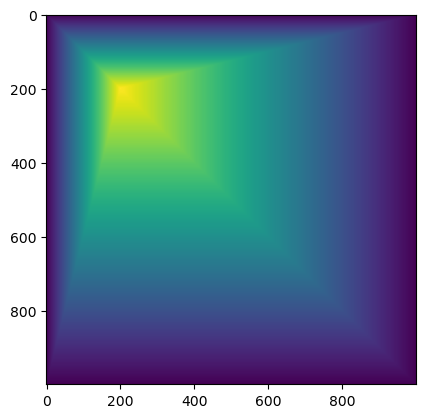

In [3]:
# Get countours
with open('/n/ramanathan_lab/aboesky/reward_contours/pyramids_100.pkl', 'rb') as f:
    contours = pickle.load(f)

plt.imshow(contours[0])

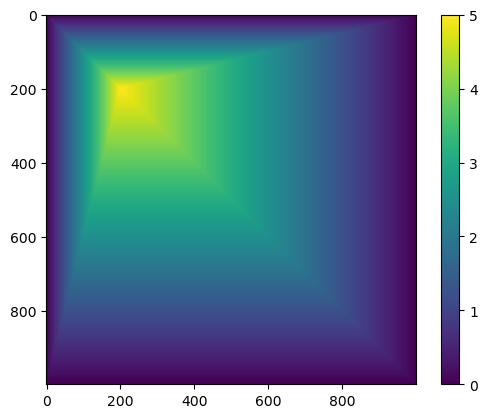

In [4]:
plt.imshow(contours[0])
plt.colorbar()

In [15]:
def gaussian_2d(x, y, x0, y0, sigma_x, sigma_y) -> np.ndarray:
    """Function that makes a 2d gaussian and returns the rewardcontour as a 2d numpy  array"""
    return np.exp(-((x - x0)**2 / (2 * sigma_x**2) + (y - y0)**2 / (2 * sigma_y**2)))

def create_pyramid_contour(x, y, peak_x, peak_y, max_h = 5):
    """Function that makes a 2d pyramid and returns the rewardcontour as a 2d numpy  array"""
    width = len(x)
    u = (1 / peak_y) * y
    l = (1 / peak_x) * x
    r = (1 / (peak_x - width)) * (x - width)
    d = (1 / (peak_y - width)) * (y - width)
    pyramid_height = np.minimum(np.minimum(np.minimum(d, r), u), l)

    return (pyramid_height / np.max(pyramid_height)) * max_h

In [52]:
# Define the grid dimensions
grid_size = 1000
x = np.linspace(0, 999, grid_size)
y = np.linspace(0, 999, grid_size)
x, y = np.meshgrid(x, y)

# Parametrize the circular motion of the gaussian peak
t_period = 1000                                       # period/number of timesteps of the rotaton
angle = np.linspace(0, 2*np.pi, num=t_period)           # angular location for each peak
r = 250                                                 # radius from the center of the grid to the peak
xs, ys = r*np.cos(angle) + 500, r*np.sin(angle) + 500   # get the xs and ys of the peak
sigma_x, sigma_y = 100, 100                             # standard deviations

# Create the contours and store them in a list
z = gaussian_2d(x, y, 500, 500, sigma_x, sigma_y)
z = (z * 500) / np.max(z)  # scale so that the peak is 500

In [7]:
with open('/n/ramanathan_lab/aboesky/reward_contours/center_contour.pkl', 'wb') as f:
    pickle.dump([z], f)

In [2]:
from scipy.ndimage import convolve

def laplacian_2d(arr):
    # Define the Laplacian kernel
    laplacian_kernel = np.array([[0, 1, 0],
                                 [1, -4, 1],
                                 [0, 1, 0]])

    # Apply the kernel to the array using convolution
    laplacian = convolve(arr, laplacian_kernel, mode='reflect')
    
    return laplacian

In [50]:
# Define the grid dimensions
grid_size = 1000
x = np.linspace(0, 999, grid_size)
y = np.linspace(0, 999, grid_size)
x, y = np.meshgrid(x, y)

# Parametrize the circular motion of the gaussian peak
t_period = 1000                                       # period/number of timesteps of the rotaton
angle = np.linspace(0, 2*np.pi, num=t_period)           # angular location for each peak
r = 250                                                 # radius from the center of the grid to the peak
xs, ys = r*np.cos(angle) + 500, r*np.sin(angle) + 500   # get the xs and ys of the peak

# Create the contours and store them in a list
z = create_pyramid_contour(x, y, 800, 500)
z = (z * 500) / np.max(z)  # scale so that the peak is 500

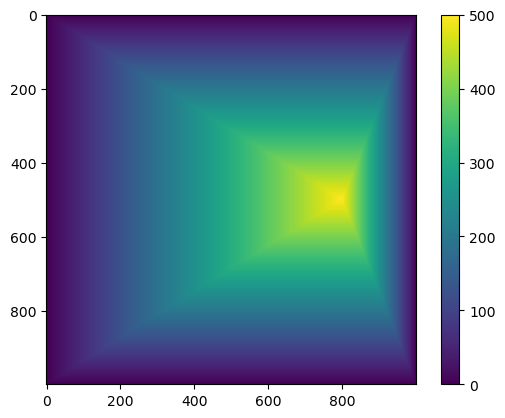

In [36]:
plt.imshow(z)
plt.colorbar()

In [11]:
num_points_per_segment = 25

# Coordinates for the square path
points = [(200, 200), (800, 200), (800, 800), (200, 800), (200, 200)]  # Closing the loop

# Generate the x and y coordinates for the square path
x_coords, y_coords = [], []
for i in range(len(points) - 1):
    x_coords.extend(np.linspace(points[i][0], points[i+1][0], num_points_per_segment, endpoint=False))
    y_coords.extend(np.linspace(points[i][1], points[i+1][1], num_points_per_segment, endpoint=False))

# Convert to numpy arrays
x_coords = np.array(x_coords)
y_coords = np.array(y_coords)

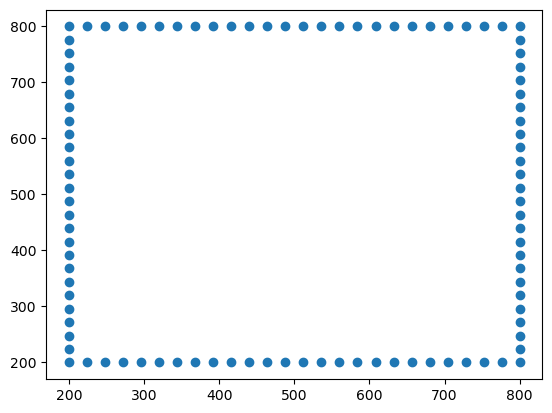

In [12]:
plt.scatter(x_coords, y_coords)

In [16]:
grids = []
grid_size = 1000
x = np.linspace(0, 999, grid_size)
y = np.linspace(0, 999, grid_size)
x, y = np.meshgrid(x, y)

for x_peak, y_peak in zip(x_coords, y_coords):
    z = create_pyramid_contour(x, y, x_peak, y_peak, max_h=500)
    grids.append(z)

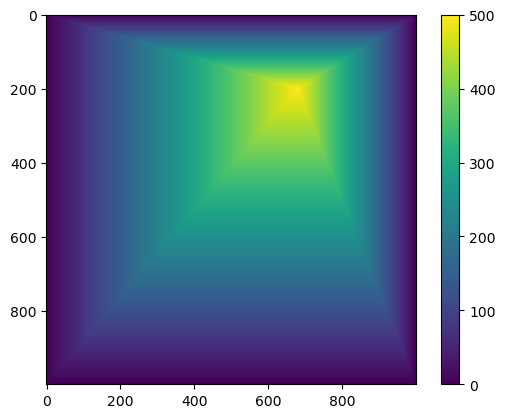

In [18]:
plt.imshow(grids[20])
plt.colorbar()

In [19]:
with open('/n/ramanathan_lab/aboesky/reward_contours/pyramids_100.pkl', 'wb') as f:
    pickle.dump(grids, f)